## Лабораторная работа №7 Вейвлеты

Среди множества инструментов, доступных инженеру по обработке сигналов, вейвлет-преобразование выделяется своей гибкостью и адаптивностью. В этой лабораторной работе мы углубимся в интуицию, лежащую в основе вейвлетов, покажем практические примеры и предоставим проницательные визуализации с помощью Python.


#**Часть 1 Теория**

#Что такое Вейвлет?

На фундаментальном уровне вейвлет - это маленькая волна. Термин «малая» используется для обозначения того, что она имеет ограниченную продолжительность. В отличие от синусоид, которые имеют длительность от $-\infty$ до $+\infty$, вейвлеты локализованы во времени, что придает им уникальные свойства, идеальные для определенных приложений.

С математической точки зрения, вейвлет должен удовлетворять следующему условию:
$\int_a^b \psi(t) \, \mathrm{d} t = 0$

Это означает, что вейвлет имеет равные положительные и отрицательные области, что приводит к нулевому среднему значению.

Представьте, что вы пытаетесь понять сложное музыкальное произведение. Если вы разделите произведение на отдельные инструменты, вы получите более четкое представление о композиции. Вейвлет-преобразование делает нечто подобное с сигналами.

Преобразование Фурье, еще один мощный инструмент, разбивает сигнал на его синусоидальные компоненты. Однако в нем отсутствует временная локализация. Это означает, что если в сигнале происходит короткое, но значительное событие, преобразование Фурье может не отразить его эффективно.

На помощь приходят вейвлеты. Благодаря своей локализованной природе вейвлеты могут захватывать информацию как о частоте, так и о времени. Эта двойственная природа делает их особенно подходящими для нестационарных сигналов, когда свойства сигнала меняются с течением времени.

#Непрерывное вейвлет-преобразование (Continous Wavelet Transform)

CWT позволяет исследовать сигнал в различных масштабах и положениях. Математически это представляется как:

$CWT_x (a,b) = \int_{-\infty}^\infty x(t) \frac{1}{\sqrt{|a|}} \psi(\frac{t-b}{a}) \, \mathrm{d} t$,

где  $x(t)$ - входной сигнал; $\psi$ - вейвлет-функция; $a$ - масштабный коэффициент, дающий информацию о частотной составляющей; $b$ - коэффициент перевода, обеспечивающий временную локализацию.

Представьте себе CWT как увеличительное стекло. Регулируя увеличение (масштаб $a$), вы можете приблизить определенные части сигнала, а перемещая лупу (перевод $b$), вы можете рассмотреть различные временные интервалы.

#Дискретное вейвлет-преобразование (Discrete Wavelet Transform)

В то время как CWT является непрерывным по своей природе, в цифровой сфере мы часто работаем с дискретными сигналами. DWT обеспечивает эффективный с точки зрения вычислений метод анализа сигналов с различным разрешением.

DWT разлагает сигнал на два набора коэффициентов: коэффициенты аппроксимации ($c_A$) и коэффициенты детализации ($c_D$). Это разложение достигается с помощью двух наборов функций: масштабирующих функций ($\phi(t)$) и вейвлет-функций ($\psi(t)$).

Если сигнал $x[n]$ дискретный, то коэффициенты DWT по масштабу $s$ и положению $l$ определяются как:

###Коэффициент аппроксимации

$c_A(s,l) = \sum_{n}^{N-1}x[n]\phi(\frac{n - 2^sl}{2^s})$,

###Коэффициент детализации

$c_D(s,l) = \sum_{n}^{N-1}x[n]\psi(\frac{n - 2^sl}{2^s})$,

где $s$ - масштабный коэффициент; $l$ - коэффициент трансляции, определяющий местоположение в анализируемом сигнале; функции $\phi$ и $\psi$ являются производными от выбранного вейвлета (например, Daubechies, Haar).

Увеличение $s$ позволяет получить более широкое и общее представление о сигнале (более низкочастотные компоненты).



Процесс DWT может быть итеративно применен к коэффициентам аппроксимации для достижения многоуровневого разложения. На каждом уровне коэффициенты аппроксимации дополнительно разлагаются на более тонкий набор коэффициентов аппроксимации и детализации. Такое иерархическое разложение позволяет анализировать сигнал в нескольких разрешениях.

Представьте, что вы изучаете пейзаж с помощью бинокля. Настраивая зум (что сродни изменению масштаба $s$), вы можете сфокусироваться на более широких участках местности или приблизить конкретные детали. Коэффициенты приближения отражают более широкий вид, а коэффициенты детализации - конкретные тонкости. Регулируя положение $l$, вы можете изучать различные части ландшафта. DWT, благодаря своим масштабам и трансляциям, позволяет исследовать «ландшафт» сигнала подобным образом.

Дискретное вейвлет-преобразование обеспечивает гибкую основу для анализа сигналов с различным разрешением. Улавливая как широкие тенденции (аппроксимация), так и мельчайшие детали (детализация), оно позволяет получить полное представление о базовых характеристиках сигнала.

##**Часть 2 Практика**

Давайте погрузимся в код. Для демонстрации вейвлет-преобразования мы будем использовать библиотеку PyWavelets (pywt) в Python.

##Задание 1

Установите библиотеку pyWavelets (https://pywavelets.readthedocs.io/en/latest/#)

In [ ]:
!pip install pywavelets

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

##Задание 2
Разложите простой синусоидальный сигнал с помощью DWT (https://pywavelets.readthedocs.io/en/latest/ref/dwt-discrete-wavelet-transform.html) используя вейвлеты Daubechies и Haar. Визуализируйте результаты, сравните полученные коэффициенты.

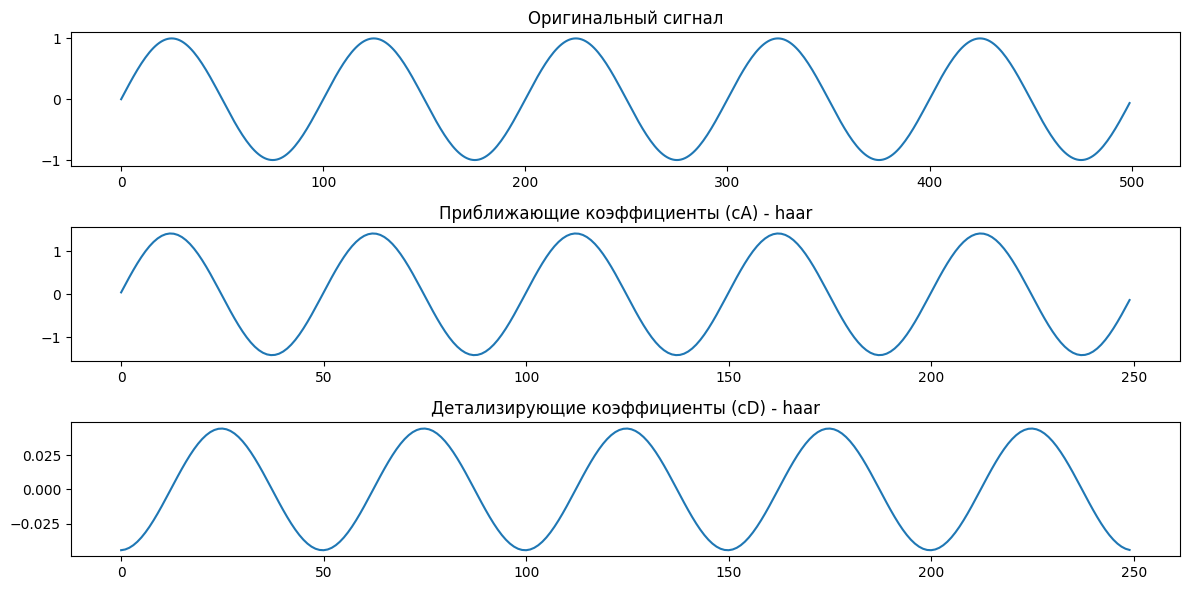

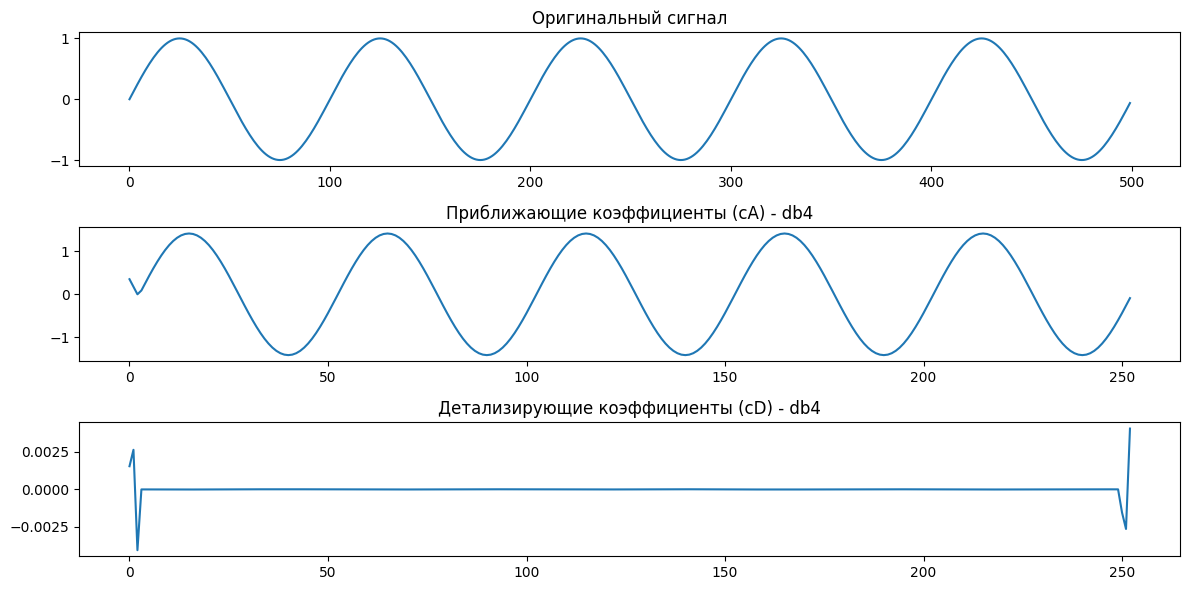

Haar coefficients (cA, cD) первые 10 значений:
cA: [0.0443996  0.22112258 0.39435832 0.56137479 0.71953805 0.86635376
 0.99950656 1.11689654 1.2166724  1.2972606 ]
cD: [-0.0443996  -0.04387462 -0.04265771 -0.04076806 -0.03823547 -0.03509989
 -0.03141076 -0.02722626 -0.02261239 -0.01764191]

Daubechies 4 coefficients (cA, cD) первые 10 значений:
cA: [ 3.51264314e-01  1.76447986e-01 -5.12566910e-05  8.93220133e-02
  2.65511748e-01  4.37514204e-01  6.02616800e-01  7.58215769e-01
  9.01857222e-01  1.03127585e+00]
cD: [ 1.54566870e-03  2.64166063e-03 -4.05951378e-03 -2.14967337e-06
 -3.11604408e-06 -4.03327292e-06 -4.88689464e-06 -5.66344711e-06
 -6.35068363e-06 -6.93776609e-06]


In [ ]:
fs = 500
t = np.linspace(0, 1, fs, endpoint=False)
freq = 5
signal = np.sin(2 * np.pi * freq * t)

def dwt_decompose(signal, wavelet_name):
    coeffs = pywt.dwt(signal, wavelet_name)
    cA, cD = coeffs
    plt.figure(figsize=(12,6))
    plt.subplot(3,1,1)
    plt.plot(signal)
    plt.title(f'Оригинальный сигнал')
    plt.subplot(3,1,2)
    plt.plot(cA)
    plt.title(f'Приближающие коэффициенты (cA) - {wavelet_name}')
    plt.subplot(3,1,3)
    plt.plot(cD)
    plt.title(f'Детализирующие коэффициенты (cD) - {wavelet_name}')
    plt.tight_layout()
    plt.show()
    return cA, cD

haar_cA, haar_cD = dwt_decompose(signal, 'haar')
db4_cA, db4_cD = dwt_decompose(signal, 'db4')

print("Haar coefficients (cA, cD) первые 10 значений:")
print("cA:", haar_cA[:10])
print("cD:", haar_cD[:10])
print("\nDaubechies 4 coefficients (cA, cD) первые 10 значений:")
print("cA:", db4_cA[:10])
print("cD:", db4_cD[:10])


##Задание 3
Рассмотрите простой сигнал, состоящий из двух синусоид разной частоты. Для анализа этого сигнала использовать DWT. Проверьте разные вейвлеты ($pywt.families()$)

In [ ]:
#ваш код

##Задание 4
Визуализируйте вейвлет-преобразования нестационарного сигнала. Для этого используйте CWT с масштабами $scales=np.arange(1, 128)$. Выберите все подходящие для CWT вейвлеты из семейства вейвлетов.

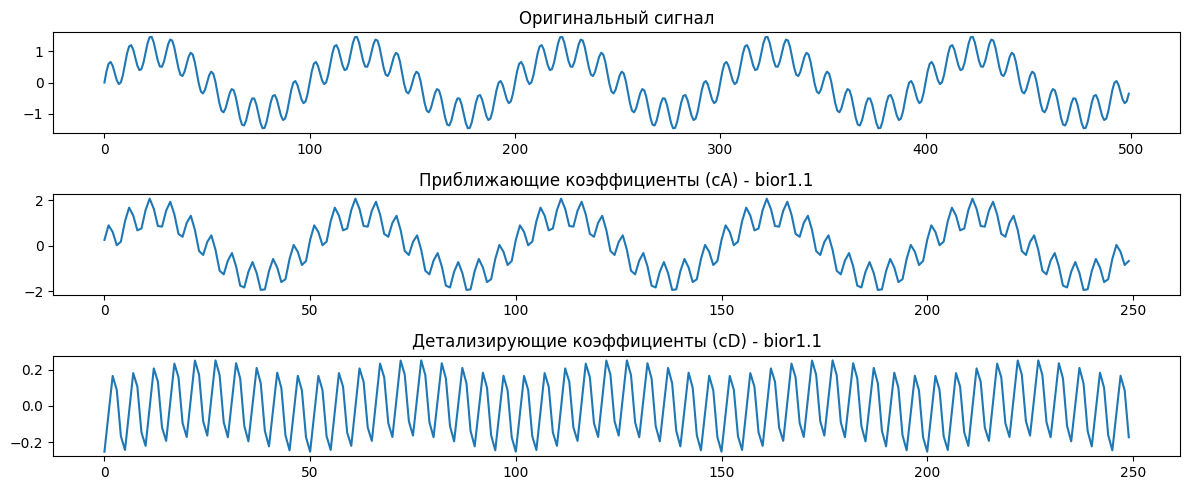

Вейвлет: bior1.1
cA первые 10 значений: [0.25221307 0.89362109 0.60217179 0.01731207 0.17547533 1.07416723
 1.67200507 1.32471001 0.67260967 0.75319788]
cD первые 10 значений: [-0.25221307 -0.04387462  0.16515576  0.08766773 -0.16667126 -0.24291336
 -0.03141076  0.18058721  0.10582339 -0.1460777 ]


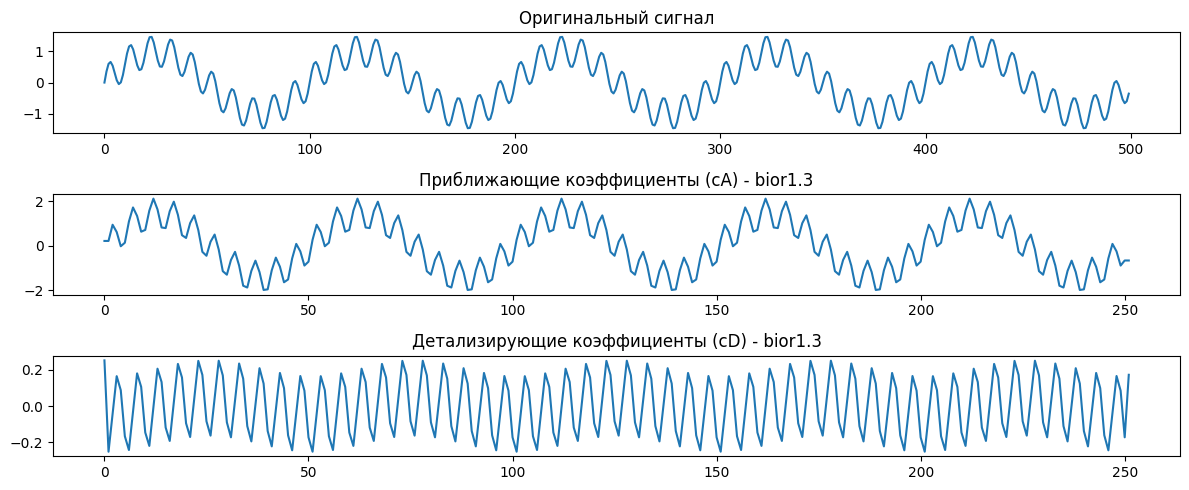

Вейвлет: bior1.3
cA первые 10 значений: [ 0.21520211  0.21520211  0.94579219  0.61861458 -0.02416631  0.13415269
  1.09107479  1.72494264  1.34186428  0.63177656]
cD первые 10 значений: [ 0.25221307 -0.25221307 -0.04387462  0.16515576  0.08766773 -0.16667126
 -0.24291336 -0.03141076  0.18058721  0.10582339]


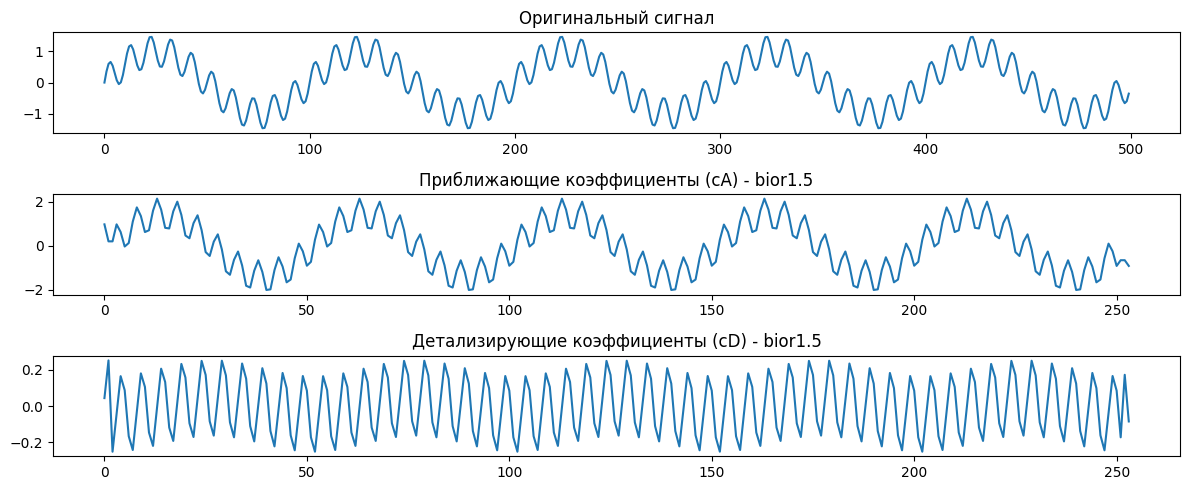

Вейвлет: bior1.5
cA первые 10 значений: [ 0.96921289  0.19848047  0.19848047  0.96921289  0.62277574 -0.03505573
  0.12326373  1.09523733  1.73840764  1.34602754]
cD первые 10 значений: [ 0.04387462  0.25221307 -0.25221307 -0.04387462  0.16515576  0.08766773
 -0.16667126 -0.24291336 -0.03141076  0.18058721]


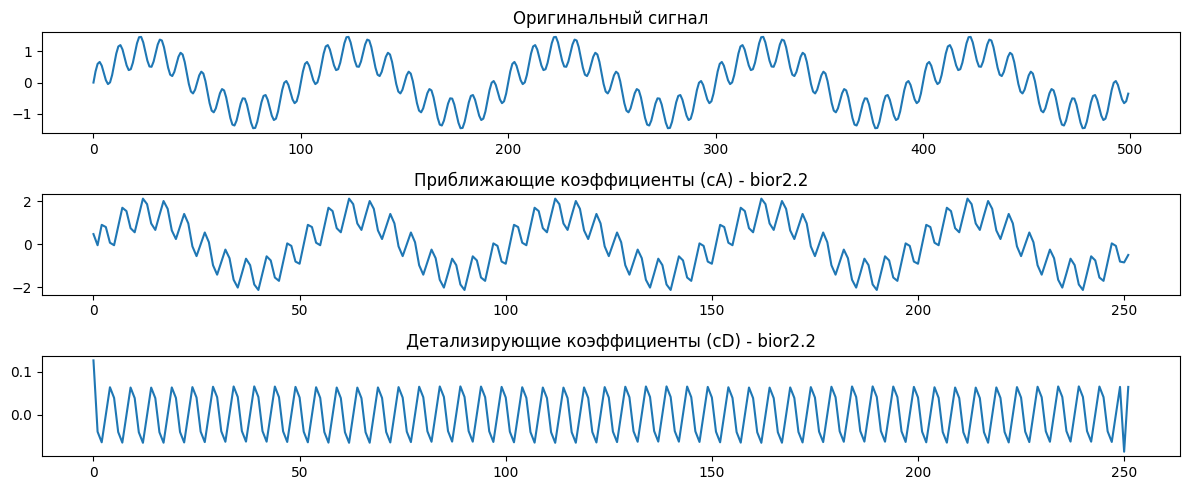

Вейвлет: bior2.2
cA первые 10 значений: [ 0.47356926 -0.04316504  0.90187437  0.79978281  0.07338349 -0.04247843
  0.8320724   1.69350095  1.53847915  0.7474999 ]
cD первые 10 значений: [ 0.12610654 -0.03977645 -0.06447935 -0.00043118  0.0636238   0.03894119
 -0.04057825 -0.06523503 -0.00112883  0.06299517]


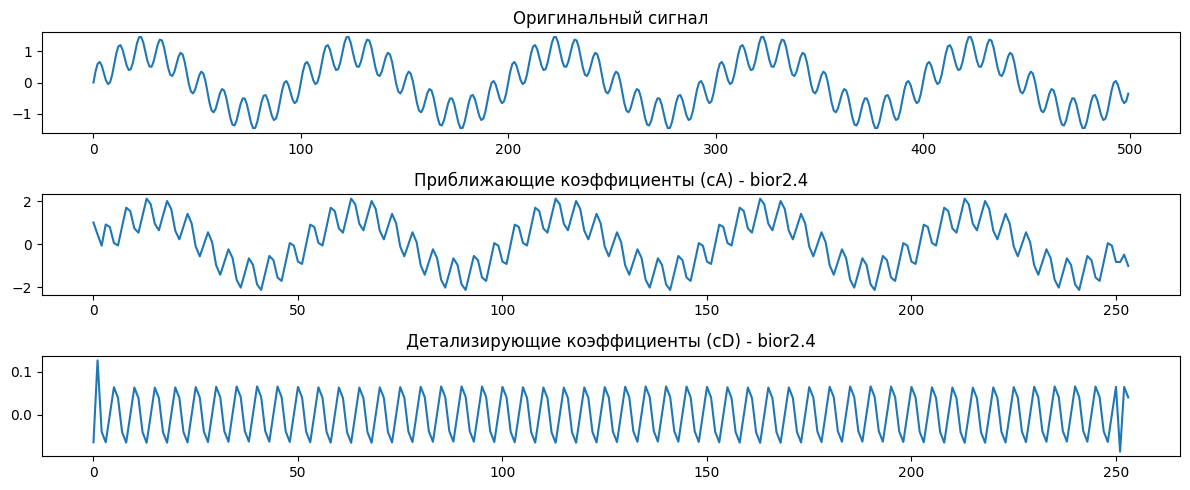

Вейвлет: bior2.4
cA первые 10 значений: [ 1.01499536  0.46030119 -0.06334025  0.92343042  0.80810386  0.06506498
 -0.05593853  0.83207482  1.70696586  1.54680235]
cD первые 10 значений: [-0.06439277  0.12610654 -0.03977645 -0.06447935 -0.00043118  0.0636238
  0.03894119 -0.04057825 -0.06523503 -0.00112883]


In [ ]:
fs = 500
t = np.linspace(0, 1, fs, endpoint=False)
signal = np.sin(2*np.pi*5*t) + 0.5*np.sin(2*np.pi*50*t)

discrete_wavelets = pywt.wavelist(kind='discrete')

for wavelet_name in discrete_wavelets[:5]:  # первые 5 для примера
    cA, cD = pywt.dwt(signal, wavelet_name)
    plt.figure(figsize=(12,5))
    plt.subplot(3,1,1)
    plt.plot(signal)
    plt.title(f'Оригинальный сигнал')
    plt.subplot(3,1,2)
    plt.plot(cA)
    plt.title(f'Приближающие коэффициенты (cA) - {wavelet_name}')
    plt.subplot(3,1,3)
    plt.plot(cD)
    plt.title(f'Детализирующие коэффициенты (cD) - {wavelet_name}')
    plt.tight_layout()
    plt.show()
    print(f"Вейвлет: {wavelet_name}")
    print("cA первые 10 значений:", cA[:10])
    print("cD первые 10 значений:", cD[:10])

##Задание 5

Сгенерируйте синусоидальный сигнал с шумом и с помощью вейвлетов избавьтесь от шума (https://notebook.community/CSchoel/learn-wavelets/wavelet-denoising)

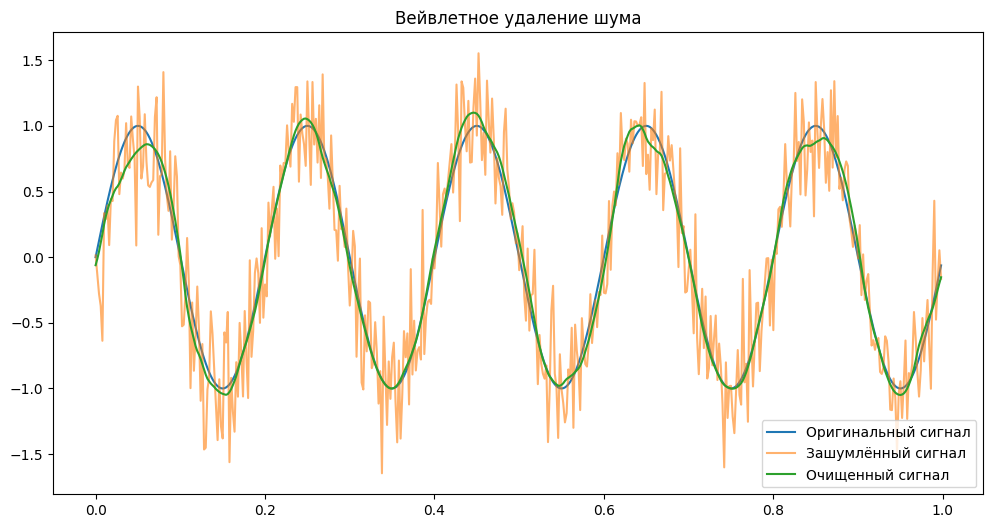

In [ ]:
fs = 500
t = np.linspace(0, 1, fs, endpoint=False)
freq = 5
signal = np.sin(2 * np.pi * freq * t)
noisy_signal = signal + 0.3 * np.random.randn(len(signal))

wavelet = 'db4'
coeffs = pywt.wavedec(noisy_signal, wavelet, level=4)
sigma = np.median(np.abs(coeffs[-1])) / 0.6745
uthresh = sigma * np.sqrt(2 * np.log(len(noisy_signal)))

denoised_coeffs = [pywt.threshold(c, value=uthresh, mode='soft') if i>0 else c for i, c in enumerate(coeffs)]
denoised_signal = pywt.waverec(denoised_coeffs, wavelet)

plt.figure(figsize=(12,6))
plt.plot(t, signal, label='Оригинальный сигнал')
plt.plot(t, noisy_signal, label='Зашумлённый сигнал', alpha=0.6)
plt.plot(t, denoised_signal, label='Очищенный сигнал')
plt.legend()
plt.title('Вейвлетное удаление шума')
plt.show()


##Задание 6
Для произвольного полутонового изображения выполните сжатие с помощью вейвлетов (https://github.com/tmoynandy/dwt_image_compression_pywavelet/tree/master) или (https://github.com/danielaczarref/Wavelet-Image-Processing/blob/master/DWTcompress.ipynb):

- Разложите изображение с помощью дискретного вейвлет-преобразования (DWT).

- Сделайте пороговое выделение коэффициентов, сохранив только значимые.

- Восстановите сжатое изображение с помощью обратного дискретного вейвлет-преобразования (IDWT).

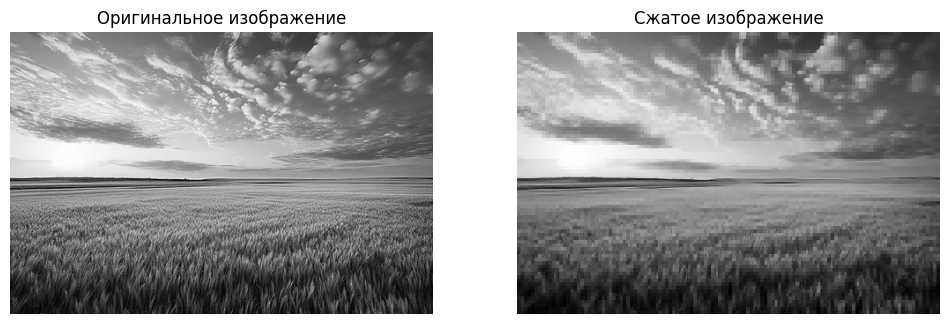

In [ ]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt

img = cv2.imread('field_1.jpg', cv2.IMREAD_GRAYSCALE)
img = img.astype(np.float32) / 255.0

wavelet = 'db1'
level = 2

coeffs = pywt.wavedec2(img, wavelet, level=level)
cA, cD = coeffs[0], coeffs[1:]

all_coeffs = [cA] + [item for sublist in cD for item in sublist]
all_coeffs_flat = np.hstack([c.flatten() for c in all_coeffs])
sigma = np.median(np.abs(all_coeffs_flat)) / 0.6745
threshold = sigma * np.sqrt(2 * np.log(img.size))

def threshold_coeffs(coeffs, thresh):
    cA, cD = coeffs[0], coeffs[1:]
    cD_thresh = []
    for detail_level in cD:
        cH, cV, cD_sub = detail_level
        cH_t = pywt.threshold(cH, thresh, mode='soft')
        cV_t = pywt.threshold(cV, thresh, mode='soft')
        cD_t = pywt.threshold(cD_sub, thresh, mode='soft')
        cD_thresh.append((cH_t, cV_t, cD_t))
    return [cA] + cD_thresh

coeffs_thresh = threshold_coeffs(coeffs, threshold)
img_compressed = pywt.waverec2(coeffs_thresh, wavelet)
img_compressed = np.clip(img_compressed, 0, 1)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Оригинальное изображение')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img_compressed, cmap='gray')
plt.title('Сжатое изображение')
plt.axis('off')
plt.show()


##Задание 7
Выполните обнаружение границ с помощью вейвлет-преобразований (https://github.com/aravindr18/Wavelet-Based-Edge-Detection/tree/master)

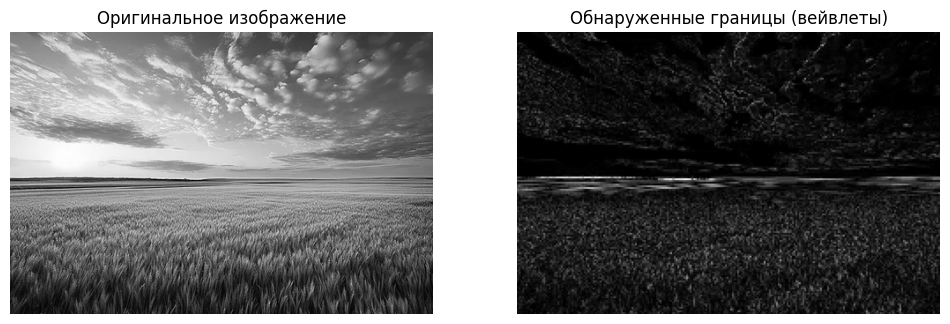

In [ ]:
wavelet = 'haar'
coeffs2 = pywt.dwt2(img, wavelet)
cA, (cH, cV, cD) = coeffs2

edges = np.sqrt(cH**2 + cV**2)
edges = edges / np.max(edges)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Оригинальное изображение')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(edges, cmap='gray')
plt.title('Обнаруженные границы (вейвлеты)')
plt.axis('off')
plt.show()

##Выводы

Вейвлет-преобразование позволяет выделять как частотные, так и локальные особенности сигнала или изображения. При обработке изображений вейвлеты эффективно выявляют границы, шум и детали на разных масштабах. В отличие от Фурье-преобразования, вейвлеты сохраняют информацию о положении особенностей, что делает их особенно полезными для анализа, сжатия и фильтрации изображений.
